<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import wordcloud as WordCloud

#
#

#
#

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1': 'labels', 'v2': 'data'}, inplace=True)

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

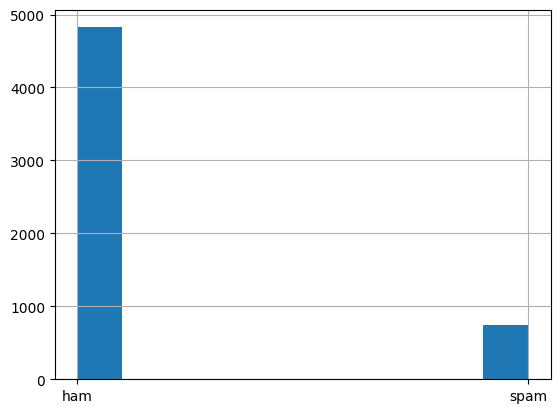

In [9]:
df['labels'].hist()

In [10]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [11]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [12]:
df_train

,data
621,Good words.... But words may leave u in dismay...
3455,Ok. I.ll do you right later.
4296,thesmszone.com lets you send free anonymous an...
5090,"St andre, virgil's cream"
3306,Set a place for me in your heart and not in yo...
...,...
3751,Why are u up so early?
3540,If you are not coughing then its nothing
3667,Thanks for loving me so. You rock
2352,Thats cool. How was your day?


In [13]:
Ytrain

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [15]:
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 49539 stored elements and shape (3733, 6985)>

In [19]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.993838735601393
Test score: 0.9864056552474171


In [21]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1", f1_score(Ytrain, Ptrain))
print("test F1", f1_score(Ytest, Ptest))

train F1 0.9768378650553877
test F1 0.94824016563147


In [22]:
Prob_train = model.predict_proba(Xtrain)[:, 1]
Prob_test = model.predict_proba(Xtest)[:, 1]
print("train AUC", roc_auc_score(Ytrain, Prob_train))
print("test AUC", roc_auc_score(Ytest, Prob_test))

train AUC 0.9919616598689028
test AUC 0.9807054804241601


In [27]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3225,    9],
       [  14,  485]])

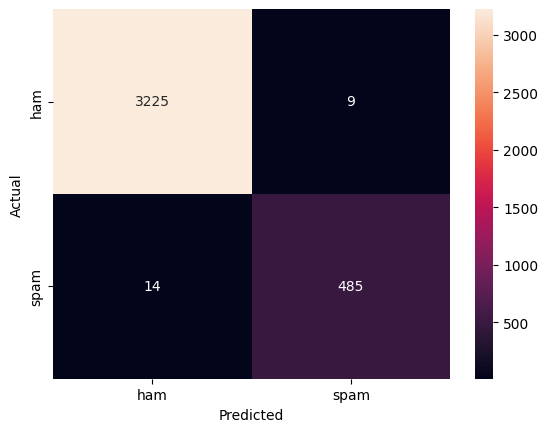

In [28]:
def plot_confusion_matrix(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')


plot_confusion_matrix(cm)

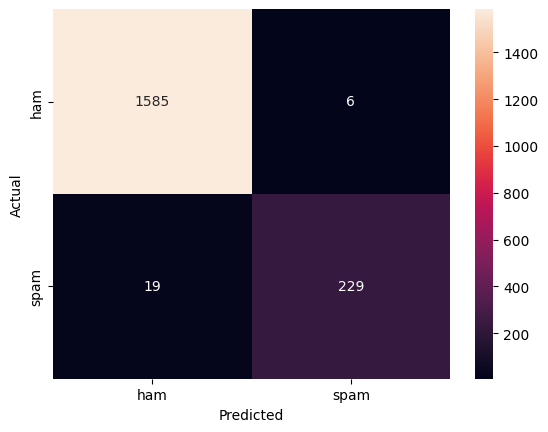

In [29]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_confusion_matrix(cm_test)

In [30]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud.WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

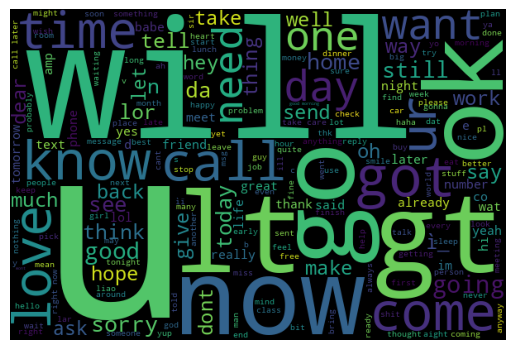

In [31]:
visualize('ham')

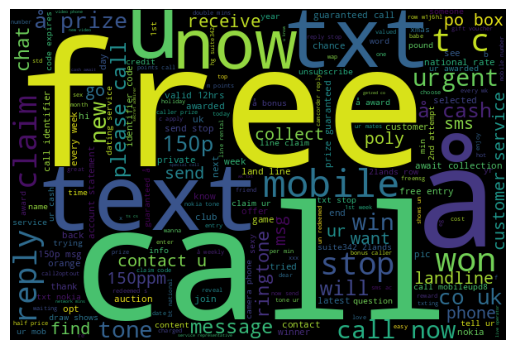

In [32]:
visualize('spam')

In [33]:
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)


In [34]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Thou

In [35]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Yes:)from last week itself i'm taking live call.
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Dhoni have luck to win some big title.so we will win:)


In [40]:


tokens = featurizer.get_feature_names_out()
for token in tokens:
    print(token)

00
000
000pes
008704050406
0121
01223585236
01223585334
0125698789
02
02072069400
02073162414
02085076972
021
03
04
0430
05
050703
0578
06
07
07046744435
07090201529
07090298926
07099833605
07123456789
07732584351
07734396839
07742676969
07753741225
0776xxxxxxx
07786200117
07808
07808247860
07821230901
0796xxxxxx
07973788240
07xxxxxxxxx
08
0800
08000407165
08000776320
08000839402
08000930705
08000938767
08001950382
08002888812
08002986030
08002986906
08006344447
0808
08081263000
08081560665
0825
0844
08448350055
0845
08452810071
08452810073
0870
08700435505150p
08700469649
08700621170150p
08701213186
08701417012
08701417012150p
087016248
08701752560
0870241182716
08702840625
08704439680
08704439680ts
08706091795
08707509020
0870753331018
08707808226
08708034412
08708800282
08709222922
08709501522
0871
08712101358
08712300220
087123002209am
08712317606
08712400602450p
08712400603
08712402050
08712402779
08712402902
08712402972
08712405020
08712405022
08712460324
08712466669
087127781071